In [14]:
import statistics
import numpy as np
import pandas as pd
from scipy.stats import mstats
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
# Import the raw wiretapping data (sourced from https://www.kaggle.com/eff/california-wire-tapping)
# Information here: https://www.eff.org/deeplinks/2017/06/california-finally-releases-wiretap-dataset
# State report here: https://www.eff.org/files/2017/06/09/2016_ca_electronic_interceptions_report.pdf
wt_data = pd.read_csv('/Users/guest/Desktop/Capstone/california_wt2_export_2016.csv')

# Add a column for total cost.
wt_data['TotalCost'] = wt_data['PersonnelCost'] + wt_data['ResourceCost']

In [5]:
# Import county population data (sourced from http://www.dof.ca.gov/Forecasting/Demographics/Estimates/E-1/)
county_pop = pd.read_csv('/Users/guest/Desktop/Capstone/CA_county_population.csv', index_col=0)

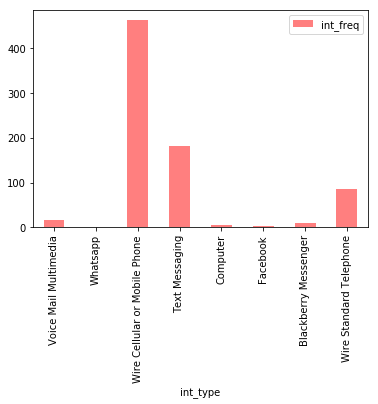

In [205]:
# The intercept locations are split across several columns; consolidate them.

# Retrieve a list of unique intercept types.
intercept_variables = ('InterceptOne', 'InterceptTwo', 'InterceptThree', 'InterceptFour')
intercept_types = []

for var in intercept_variables:
    intercept_values.extend(wt_data[var].unique())
    
intercept_types = [x for x in list(set(intercept_values)) if str(x) != 'nan']

intercept_types = intercept_types[1:]


# Sum the values across all columns.
intercept_sums = []

for int_type in intercept_types:
    in1 = wt_data.loc[lambda df: wt_data['InterceptOne'] == int_type, :].shape[0]
    in2 = wt_data.loc[lambda df: wt_data['InterceptTwo'] == int_type, :].shape[0]
    in3 = wt_data.loc[lambda df: wt_data['InterceptThree'] == int_type, :].shape[0]
    in4 = wt_data.loc[lambda df: wt_data['InterceptFour'] == int_type, :].shape[0]
    
    intercept_sums.append(in1 + in2 + in3 + in4)

    
# Consolidate these lists into a dataframe.
intercept_data = pd.DataFrame()
intercept_data['int_type'] = intercept_types
intercept_data['int_freq'] = intercept_sums


intercept_data.plot('int_type', 'int_freq', kind='bar', color='r', alpha=0.5)

In [7]:
# QUESTION ONE:
# What jurisdictions spend the most on wiretapping per capita?
# Break out by Judge where appropriate; I'd like to do a stacked bar chart.

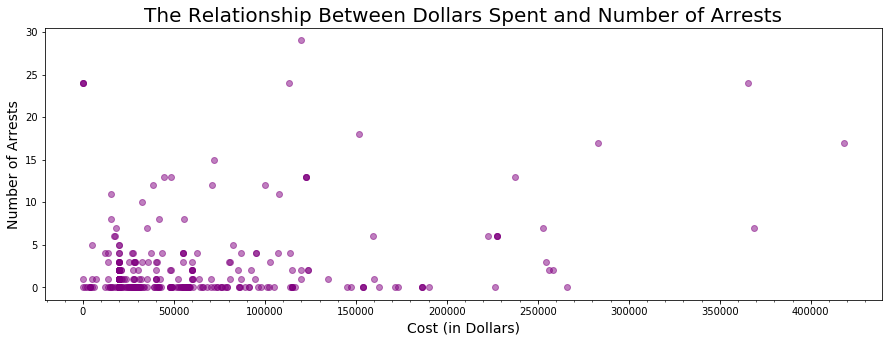

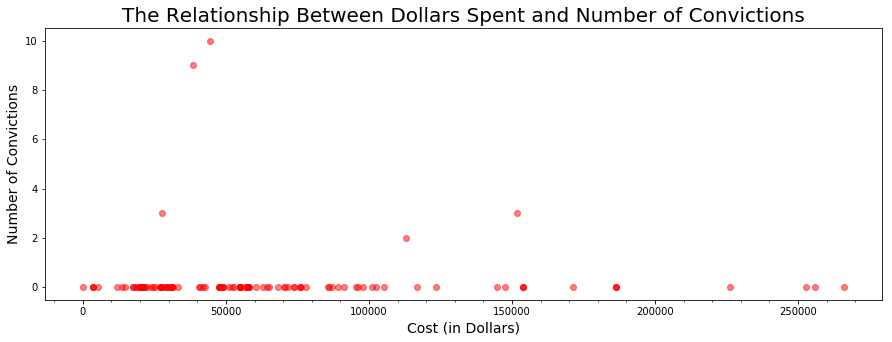

In [193]:
# QUESTION TWO:
# Is there a relationship between cost and arrests? Convictions?
# How many people are surveilled without arrest?

# Remove the most extreme outlier for clearer viewing.
wt_data.loc[wt_data['Arrested'] == 58]
wt_adjusted = wt_data.drop([515])

plt.figure(figsize=(15,5))
plt.title('The Relationship Between Dollars Spent and Number of Arrests', fontsize=20)
plt.ylabel('Number of Arrests', fontsize=14) # Label the Y axis
plt.xlabel('Cost (in Dollars)', fontsize=14) # Label the X axis
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10000))
plt.scatter(wt_adjusted['TotalCost'], wt_adjusted['Arrested'], alpha=0.5, color='purple')
plt.show()

plt.figure(figsize=(15,5))
plt.title('The Relationship Between Dollars Spent and Number of Convictions', fontsize=20)
plt.ylabel('Number of Convictions', fontsize=14) # Label the Y axis
plt.xlabel('Cost (in Dollars)', fontsize=14) # Label the X axis
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10000))
plt.scatter(wt_adjusted['TotalCost'], wt_adjusted['Convicted'], alpha=0.5, color='red')
plt.show()

In [9]:
# QUESTION THREE:
# Which types of crimes receive the most wiretap funding?
# Which types of crimes yield the most arrests? 